In [57]:
print("Radha aman")
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np;
import matplotlib.pyplot as plt

Radha aman


In [58]:
medical_df = pd.read_csv('medical.csv')
smoker_values = {'yes': 1, 'no': 0}
smoker_numeric = medical_df['smoker'].map(smoker_values)
medical_df['smoker_numeric'] = smoker_numeric
non_smoker_df = medical_df[medical_df['smoker'] == 'no']

In [59]:
model = LinearRegression() # uses ols method
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']


**fit the model**

In [60]:
model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
model.predict(np.array([[23], [37], [61]]))

c:\ArtificialIntelligence\ml-scikit-learn\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [62]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [63]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [64]:
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target-prediction)));
rmse(non_smoker_df.charges , predictions)

np.float64(4662.505766636395)

In [65]:
def estimate_charges(age , w , b):
    return w * age + b;

In [66]:
def try_parameters(w,b):
    target = non_smoker_df.charges
    ages = non_smoker_df.age
    estimated_charges = estimate_charges(ages,w,b)
    plt.plot(ages,estimated_charges, 'r-')
    plt.scatter(ages,target,alpha=0.8)
    plt.xlabel('Age of person')
    plt.ylabel('Charges')
    plt.legend(['Estimated Charges', 'Actual Charges'])
    plt.show()
    return estimated_charges

[267.24891283]
-2091.4205565650864


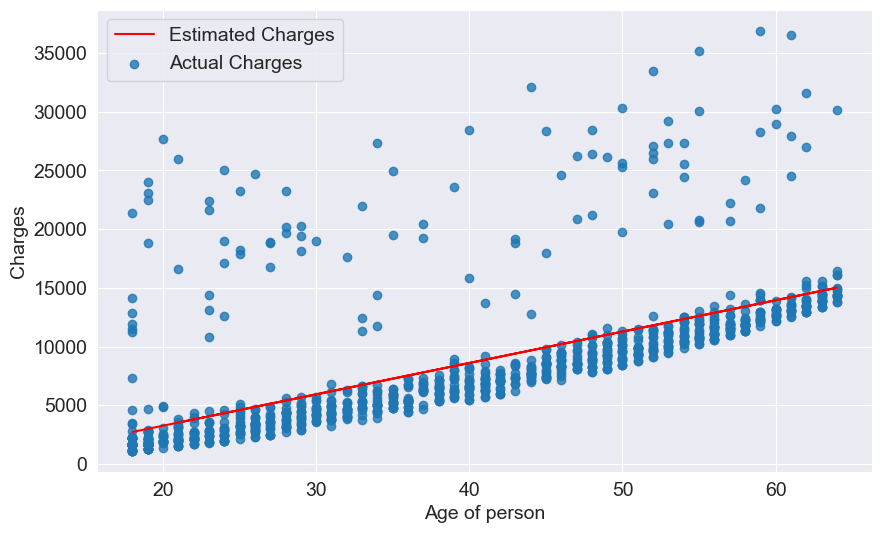

1        2719.059874
2        5391.549003
3        6727.793567
4        6460.544654
5        6193.295741
            ...     
1332    11805.522911
1333    11271.025085
1334     2719.059874
1335     2719.059874
1336     3520.806613
Name: age, Length: 1064, dtype: float64

In [67]:
#w
print(model.coef_)
#b
print(model.intercept_)
try_parameters(model.coef_[0],model.intercept_)

In [68]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor()
sgd_model.fit(inputs,targets)
sgd_model.predict(inputs)

array([2694.00133158, 4812.81192344, 5872.21721937, ..., 2694.00133158,
       2694.00133158, 3329.64450914], shape=(1064,))

In [69]:
print(sgd_model.coef_)
print(sgd_model.intercept_)
print(rmse(non_smoker_df.charges , predictions)) # in this case ols method is good
rmse(non_smoker_df.charges , sgd_model.predict(inputs))

[211.88105919]
[-1119.85773377]
4662.505766636395


np.float64(4879.384727362197)

**LR using multiple features**

In [70]:
import plotly.express as px;
import matplotlib
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [71]:
fig = px.scatter(medical_df , x='bmi' , y='charges' , color='smoker',color_discrete_sequence=['red', 'blue']);
fig.show()

In [72]:
inputs = non_smoker_df[['age','bmi']]
targets = non_smoker_df['charges']
model = LinearRegression();
model.fit(inputs,targets)
predictions = model.predict(inputs)
print(model.coef_, model.intercept_)
rmse(targets,predictions)

[266.87657817   7.07547666] -2293.6320906488727


np.float64(4662.3128354612945)

In [75]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

In [76]:
inputs = non_smoker_df[['age', 'bmi' , 'children']]
targets = non_smoker_df['charges']
model = LinearRegression();
model.fit(inputs,targets)
predictions = model.predict(inputs)
rmse(targets,predictions)

np.float64(4608.470405038246)

In [80]:
medical_df.charges.corr(medical_df.smoker_numeric)

np.float64(0.7872514304984778)

In [89]:
fig = px.scatter(medical_df , x='age' , y='charges' , color='smoker',color_discrete_sequence=['red', 'blue']);
fig.show()

In [93]:
inputs = medical_df[['age', 'bmi' , 'children', 'smoker_numeric']]
targets = medical_df['charges']
model = LinearRegression();
model.fit(inputs,targets)
predictions = model.predict(inputs)
rmse(targets,predictions)

np.float64(6056.439217188081)

In [91]:
sex_values = {'male':0 , 'female':1}
medical_df['sex_numeric'] = medical_df.sex.map(sex_values)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [92]:
inputs = medical_df[['age', 'bmi' , 'children', 'smoker_numeric', 'sex_numeric']]
targets = medical_df['charges']
model = LinearRegression();
model.fit(inputs,targets)
predictions = model.predict(inputs)
rmse(targets,predictions)

np.float64(6056.100708754546)

**using categorical feature for machine learning**

<Axes: xlabel='smoker', ylabel='charges'>

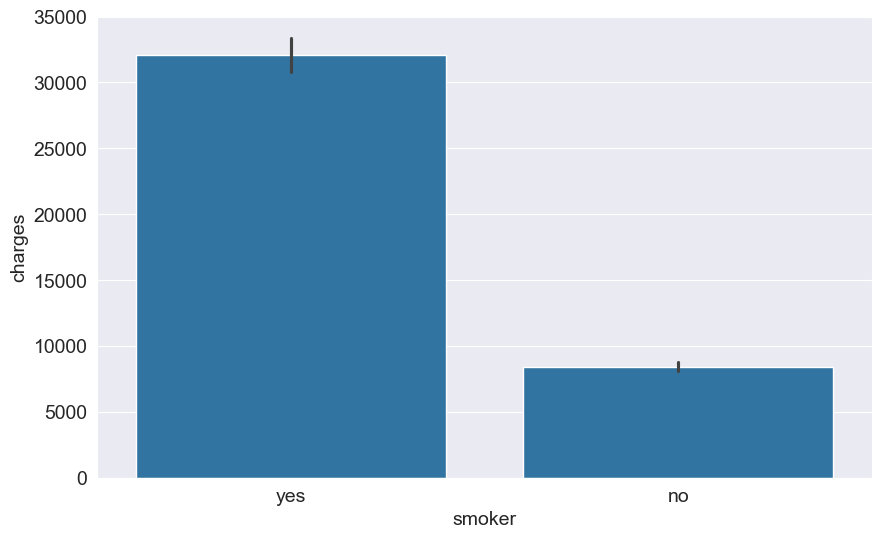

In [101]:
sns.barplot(data=medical_df , x='smoker' , y='charges')

In [99]:
medical_df.value_counts('region')
region_values = {'southeast':0 , 'northwest':1, 'southwest':2, 'northeast':3}
medical_df['region_numeric'] = medical_df.region.map(region_values)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric,region_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,2
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,2


In [100]:
inputs = medical_df[['age', 'bmi' , 'children', 'sex_numeric', 'region_numeric' , 'smoker_numeric']]
targets = medical_df['charges']
model = LinearRegression();
model.fit(inputs,targets)
predictions = model.predict(inputs)
rmse(targets,predictions)

np.float64(6050.128384664611)

### **good thing**

In [110]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
print(enc.categories_)
one_hot = enc.transform([['northeast'],['northwest'], ['southwest']]).toarray()
print(one_hot)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


c:\ArtificialIntelligence\ml-scikit-learn\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



In [118]:
one_hot = enc.transform(medical_df[['region']]).toarray()
print(one_hot)
print(type(one_hot))
print(len(one_hot))


[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
<class 'numpy.ndarray'>
1338


In [125]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric,region_numeric,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,2,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1,0.0,1.0,0.0,0.0


In [127]:
inputs = medical_df[['age', 'bmi' , 'children','smoker_numeric', 'sex_numeric', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df['charges']
model = LinearRegression();
model.fit(inputs,targets)
predictions = model.predict(inputs)
rmse(targets,predictions)

np.float64(6041.6796511744515)

In [129]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [135]:
inputs = ['age', 'bmi' , 'children','smoker_numeric', 'sex_numeric', 'northeast', 'northwest', 'southeast', 'southwest']
weights_df = pd.DataFrame({
    'feature': np.append(inputs,'intercept'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_numeric,23848.534542
4,sex_numeric,131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,intercept,-12656.862171


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

* We can't compare the weights of different column to identify which features are important
* A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['age','bmi','children']
scaler.fit(medical_df[numeric_cols])
print(scaler.mean_)
print(scaler.var_)

[39.20702541 30.66339686  1.09491779]
[197.25385199  37.16008997   1.45212664]


**now scale data**

In [140]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [144]:
cat_cols = ['smoker_numeric','sex_numeric', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [150]:
inputs = np.concatenate([scaled_inputs, categorical_data], axis=1)
inputs

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]], shape=(1338, 9))

# **now create and train the models**

In [151]:
inputs = np.concatenate([scaled_inputs, categorical_data], axis=1)
targets = medical_df['charges']
model = LinearRegression()
model.fit(inputs,targets)

predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print("Loss ", loss)

Loss  6041.679651174452


In [153]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols+cat_cols,'intercept'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values(ascending=False, by='weight')

,feature,weight
3,smoker_numeric,23848.534542
9,intercept,8335.168856
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_numeric,131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [160]:
new_customer = [[28,30,2,1,1,0,1,0,0]]
scaler.transform([[28,30,2]])

c:\ArtificialIntelligence\ml-scikit-learn\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [161]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0]])

array([29744.50027431])